# KNN

Método de aprendizaje supervisado basado en el reconocimiento de patrones, es generalmente utilizado en la clasificación de objetos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataframe = pd.read_csv("/content/drive/MyDrive/IA/Investigacion /EMG/datasetV2.csv")

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39565 entries, 0 to 39564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Media       39565 non-null  float64
 1   Varianza    39565 non-null  float64
 2   Desviacion  39565 non-null  float64
 3   Rms         39565 non-null  float64
 4   IEMG        39565 non-null  float64
 5   LongitudFO  39565 non-null  float64
 6   Estado      39565 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 2.1 MB


In [6]:
dataframe['Estado'].unique()

array([1, 0])

In [7]:
y = dataframe['Estado']

In [8]:
x = dataframe.drop('Estado', axis=1)

In [9]:
from sklearn.model_selection import train_test_split

Random State es un número que se usa para que los resultados de procesos aleatorios (como dividir datos o entrenar modelos) sean siempre los mismos cada vez que ejecutas el código. Esto ayuda a reproducir los mismos resultados.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=45)

In [11]:
y_test

,Estado
18482,0
13973,1
28376,0
19308,0
30564,0
...,...
15834,1
20186,0
29520,0
4537,1


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()

In [14]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
 predicciones = knn.predict(x_test)

In [16]:
predicciones

array([0, 1, 0, ..., 0, 1, 0])

In [17]:
x_test

,Media,Varianza,Desviacion,Rms,IEMG,LongitudFO
18482,-0.000351,1.221808e-06,0.001105,0.001159,0.411133,0.225342
13973,0.005126,3.697022e-02,0.192276,0.192153,79.544678,14.633057
28376,-0.000637,1.717487e-06,0.001311,0.001456,0.547119,0.343018
19308,-0.000749,2.116882e-06,0.001455,0.001635,0.547119,0.292969
30564,0.000013,1.159746e-06,0.001077,0.001076,0.394531,0.341797
...,...,...,...,...,...,...
15834,-0.001285,8.054821e-02,0.283810,0.283530,113.513672,18.466553
20186,-0.000231,9.027303e-07,0.000950,0.000977,0.355713,0.290527
29520,-0.004770,1.895725e-06,0.001377,0.004965,2.389893,0.331055
4537,0.007682,3.175323e-02,0.178194,0.178182,73.528809,17.388428


In [18]:
y_test

,Estado
18482,0
13973,1
28376,0
19308,0
30564,0
...,...
15834,1
20186,0
29520,0
4537,1


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test, predicciones))

[[10368   302]
 [  127  8986]]


<Axes: >

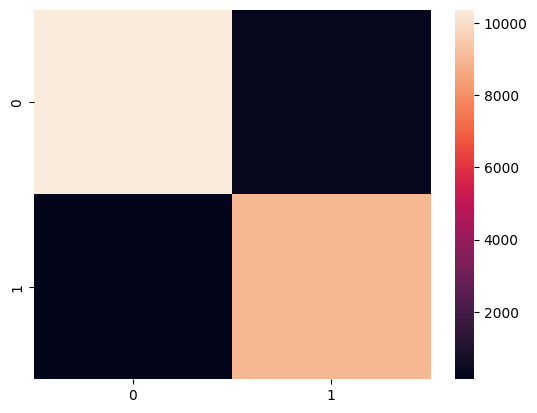

In [21]:
from os import confstr_names
sns.heatmap(confusion_matrix(y_test, predicciones))

In [22]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10670
           1       0.97      0.99      0.98      9113

    accuracy                           0.98     19783
   macro avg       0.98      0.98      0.98     19783
weighted avg       0.98      0.98      0.98     19783



In [23]:
tasa_error = []
for i in range (1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  prediccion_i= knn.predict(x_test)
  tasa_error.append(np.mean(prediccion_i != y_test))

In [24]:
tasa_error

[np.float64(0.025931355203963),
 np.float64(0.028610423090532276),
 np.float64(0.022190769852904007),
 np.float64(0.022241318303593993),
 np.float64(0.021685285346004144),
 np.float64(0.02229186675428398),
 np.float64(0.022089672951524034),
 np.float64(0.02234241520497397),
 np.float64(0.02234241520497397),
 np.float64(0.022089672951524034),
 np.float64(0.02214022140221402),
 np.float64(0.022190769852904007),
 np.float64(0.022241318303593993),
 np.float64(0.022039124500834048),
 np.float64(0.022494060557043928),
 np.float64(0.022190769852904007),
 np.float64(0.0225951574584239),
 np.float64(0.02229186675428398),
 np.float64(0.023050093514633777),
 np.float64(0.02229186675428398),
 np.float64(0.02274680281049386),
 np.float64(0.022847899711873832),
 np.float64(0.022948996613253805),
 np.float64(0.023201738866703736),
 np.float64(0.023353384218773695),
 np.float64(0.023858868725673558),
 np.float64(0.02380832027498357),
 np.float64(0.023505029570843654),
 np.float64(0.023909417176363544)

Text(0.5, 1.0, 'Tasa de error vs. Número de vecinos')

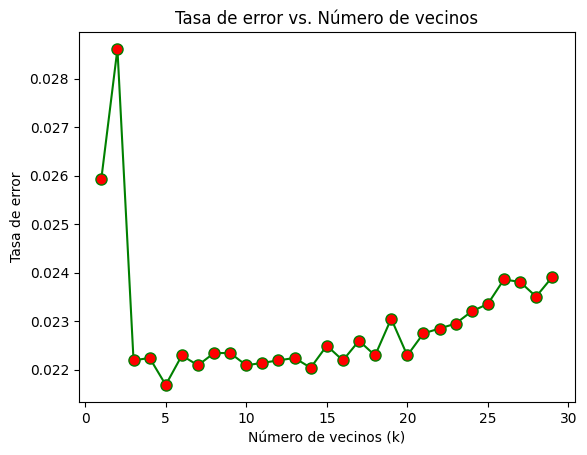

In [28]:
valores = range(1,30)
plt.plot(valores,tasa_error, color='green', marker = 'o', markerfacecolor ='red', markersize=8)

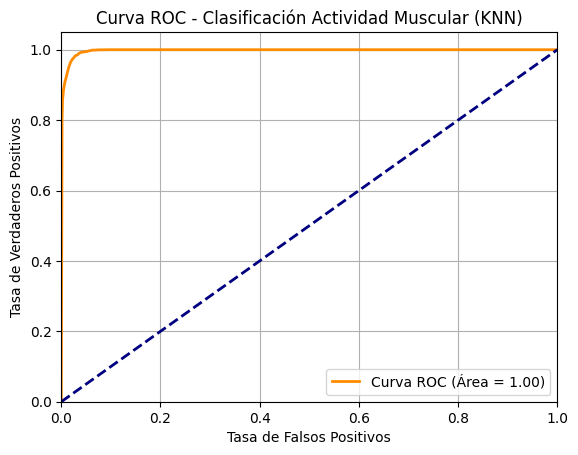

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asumiendo que 'Estado' es tu variable objetivo y ya es 0 o 1
# Y que `x_test` contiene tus variables: Media, Varianza, Desviación, etc.
# y `y_test` contiene la columna Estado

# Obtener las probabilidades de la clase 1 (actividad muscular)
knn_probs = knn.predict_proba(x_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Curva ROC (Área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Clasificación Actividad Muscular (KNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [27]:
import joblib

model_filename = '/content/drive/MyDrive/IA/Investigacion /EMG/KNN/knn_model.pkl'

# Save the model to the specified path in Google Drive
joblib.dump(knn, model_filename)

print(f"Model saved successfully to {model_filename}")



Model saved successfully to /content/drive/MyDrive/IA/Investigacion /EMG/KNN/knn_model.pkl


In [32]:
import time
import sys
import resource
import os

# Evaluate inference time
start_time = time.time()
predictions_time = knn.predict(x_test)
end_time = time.time()
inference_time = end_time - start_time
print(f"Tiempo de inferencia: {inference_time:.4f} segundos")

# Evaluate memory consumption (approximate)
# This will give the size of the model object in bytes
model_memory = sys.getsizeof(knn)
print(f"Consumo de memoria del modelo (aproximado): {model_memory} bytes")

# Evaluate RAM usage
# Note: This gives the maximum resident set size in kilobytes
# The units might vary depending on the system (e.g., resource.RUSAGE_SELF)
ram_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
print(f"Uso de RAM (máximo): {ram_usage} KB")

# Evaluate disk space used by the model file
model_file_path = '/content/drive/MyDrive/IA/Investigacion /EMG/KNN/knn_model.pkl'
if os.path.exists(model_file_path):
    disk_space = os.path.getsize(model_file_path)
    print(f"Espacio en disco utilizado por el modelo: {disk_space} bytes")
else:
    print(f"El archivo del modelo '{model_file_path}' no fue encontrado.")

Tiempo de inferencia: 0.1710 segundos
Consumo de memoria del modelo (aproximado): 48 bytes
Uso de RAM (máximo): 295252 KB
Espacio en disco utilizado por el modelo: 2348310 bytes
